<h2><center> 10-315 Intro to Machine Learning (SCS Majors) <br> Lecture 6: Logistic Regression and Optimization
  </center></h2> 


<h3><center> Leila Wehbe <br> Carnegie Mellon University  <br> Machine Learning Department </center></h3> 


<br>

<br>



Reading: <a href ="http://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf"> Generative and Disciminative Classifiers </a> by Tom Mitchell.

#### Lecture outcomes:
- Logistic Regression
- Gradient Descent Review
- Comparing LR and GNB


### Links (use the version you need)


- [Notebook](https://github.com/lwehbe/10315/blob/F24/Lecture_06_logistic_regression_and_optimization.ipynb)

- [PDF slides](https://github.com/lwehbe/10315/raw/F24/Lecture_06_logistic_regression_and_optimization.pdf)

## Questions to think about (Naïve Bayes) 


- Can you use Naïve Bayes for a combination of discrete and real-valued $X_i$? 

- How can we easily model the assumption that just 2 of the n attributes as dependent?

- What does the decision surface of a Naïve Bayes classifier look like?

- How would you select a subset of $X_i$’s?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import seaborn as sns
sns.set_theme()

x1 = np.linspace(-10,10,1000)
x2 = np.linspace(-10,10,1000)

## Naïve Bayes is a *Generative* classifier


Generative classifiers:
- Assume a functional form for $P(X,Y)$ (or $P(X|Y)$ and $P(Y)$)
- we can view $P(X|Y)$ as describing how to sample random instances $X$ given $Y$.

### Instead of learning P(X|Y), can we learn P(Y|X) directly? I.e. learn the decision boundary directly?

## *Discriminative* classifiers

- Assume some functional form for $P(Y|X)$ or for the decision boundary
- Estimate parameters of $P(Y|X)$ or decision boundary directly from training data

## Consider the following Naive Bayes setup

Learns $f: \mathcal{X} \rightarrow \{0,1\}$, where
- ${\bf x}$ is a vector of real-valued or discrete features, $(x_1,...,x_d)$
- $y$ is boolean (can also be extended for $K$ discrete classes).
- assume all $X_j$ are conditionally independent given $Y$
- model $P(X_j | Y = y_k)$ as Gaussian $\mathcal{N}(\mu_{jk},\sigma_{j})$
- model $P(Y)$ as Bernoulli($\theta$)

\begin{eqnarray}
P(Y=1|X) &=& \frac{P(Y=1)P(X|Y=1)}{P(Y=1)P(X|Y=1)+P(Y=0)P(X|Y=0)} = \frac{1}{1+\frac{P(Y=0)P(X|Y=0)}{P(Y=1)P(X|Y=1)}}\\
&=& \frac{1}{1+\exp\left(\ln\left(\frac{P(Y=0)P(X|Y=0)}{P(Y=1)P(X|Y=1)}\right)\right)} = \frac{1}{1+\exp\left(  \ln\frac{1-\theta}{\theta} +\sum_j \frac{\mu_{j0}-\mu_{j1}}{\sigma_j^2} x_j + \frac{\mu_{j0}^2-\mu_{j1}^2}{\sigma_j^2}
\right)}\\
&=&  \frac{1}{1+\exp\big(- (w_0+\sum_{j=1}^d w_j x_j)\big)}
\end{eqnarray}

## Logistic Regression is a discriminative classifier

Learns $f: \mathcal{X} \rightarrow \{0,1\}$, where
- ${\bf x}$ is a vector of real-valued or discrete features, $(x_1,...,x_d)$
- $y$ is boolean (can also be extended for $K$ discrete classes).
<!-- - assume all $X_i$ are conditionally independent given $Y$ -->
<!--  model P(Xi | Y = yk) as Gaussian N(μik,σi) -->
<!--  model P(Y) as Bernoulli (π) -->

$P(Y=1|X={\bf x})$ is modeled as:

\begin{eqnarray}
P(Y=1|X={\bf x}) = \frac{1}{1+\exp\big(- (w_0+\sum_{j=1}^d w_j x_j)\big)} = \frac{\exp(w_0+\sum_{j=1}^d w_j x_j)}{\exp(w_0+\sum_{j=1}^d w_j x_j)+1}
\end{eqnarray}

It uses the logistic (or sigmoid) function: 

\begin{eqnarray}
\frac{1}{1+\exp{(-z)}}
\end{eqnarray}

(Note: the parameters are not tied to correspond to the naive bayes parameters on the previous slide. See comparisons at end of lecture)

Text(0, 0.5, 'logistic$(Z) = P(Y=1|X)$')

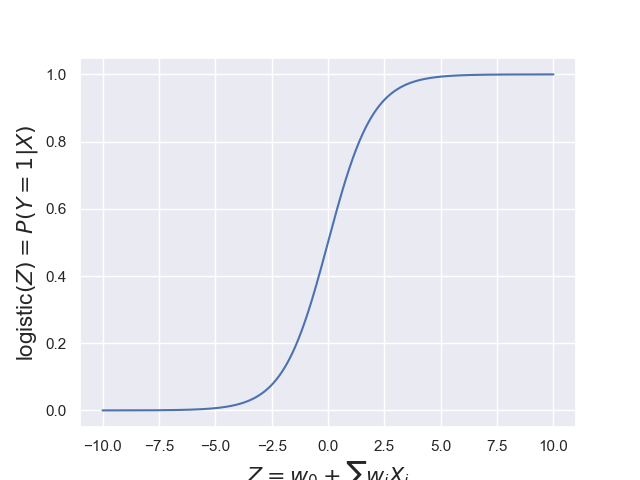

In [26]:
z = np.linspace(-10,10,1000)
plt.plot(z,1/(1+np.exp(-z)))
plt.xlabel(r'$Z = w_0+\sum_i w_i X_i$',fontsize=16)
plt.ylabel(r'logistic$(Z) = P(Y=1|X)$',fontsize=16)

## What is the form of the decision boundary?

\begin{eqnarray}
\frac{P(Y=1|X)}{P(Y=0|X)} = \frac{ \frac{\exp(w_0+\sum_{j=1}^d w_j x_j)}{\exp(w_0+\sum_{j=1}^d w_j x_j)+1}}{\frac{1}{\exp(w_0+\sum_{j=1}^d w_j x_j)+1}} = \exp(w_0+\sum_{j=1}^d w_j x_j)
\end{eqnarray}

- Asking: is $P(Y=1|X)>P(Y=0|X)$ is the same as asking: 
 $$\ln \frac{P(Y=1|X)}{P(Y=0|X)} >0?$$

- i.e. is $$w_0+\sum_{j=1}^d w_j x_j ~ ~ >0?$$

- This is a linear decision boundary!

In [2]:
from scipy.stats import multivariate_normal 
# similar to previous example
mu_1_1 = -4; sigma_1_1 = 2;mu_2_1 = 4; sigma_2_1 = 2
mu_1_0 = 4; sigma_1_0 = 2;mu_2_0 = -4; sigma_2_0 = 2
cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )
# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (20))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (20))

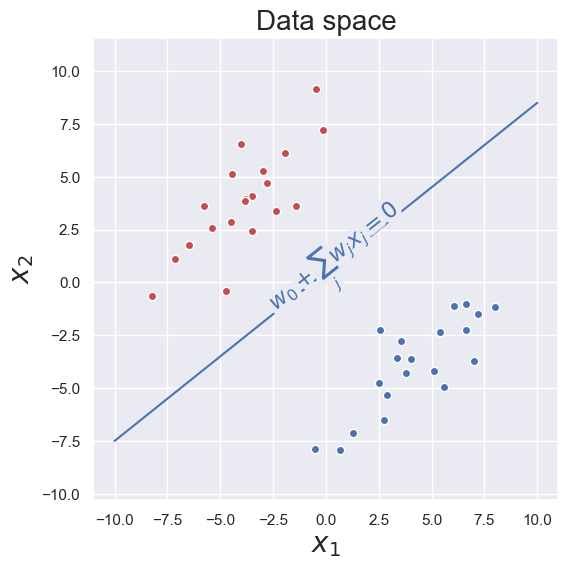

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
# hand picked line
plt.plot(x1, x1*0.8+0.5)
from labellines import labelLine
labelLine(plt.gca().get_lines()[-1],0.6,label=r'$w_0+\sum_j w_j x_j = 0$',fontsize=16)

plt.axis([-10,10,-10,10]), plt.axis('equal')
plt.xlabel(r'$x_1$',fontsize=20); plt.ylabel(r'$x_2$',fontsize=20)
plt.title('Data space',fontsize=20);

## Logistic Regression is a Linear Classifier

- Repeat what we did in Lecture 2: redefine ${\bf x}$ to have an additional dimension that is always 1, and now use the vector ${\bf w} = [w_0,w_1,...,w_d]$

\begin{eqnarray}
P(Y=1|X) = \frac{\exp({\bf w}^\top{\bf x})}{\exp({\bf w}^\top{\bf x})+1}
\end{eqnarray}


\begin{eqnarray}
P(Y=0|X) = \frac{1}{\exp({\bf w}^\top{\bf x})+1}
\end{eqnarray}

- The weights $w_j$ are optimized such that when ${\bf w}^\top{\bf x}> 0$ the example is more likely to be positive and when ${\bf w}^\top{\bf x} < 0$ it's more likely to be negative.

- ${\bf w}^\top{\bf x}= 0, ~ ~ ~ ~ ~ ~ ~ P(Y=1|X) = \frac{1}{2}$

- ${\bf w}^\top{\bf x} \rightarrow \infty,  ~ ~ ~ ~ ~ ~ ~ P(Y=1|X) \rightarrow 1$

- ${\bf w}^\top{\bf x} \rightarrow -\infty,  ~ ~ ~ ~ ~ ~ ~ P(Y=1|X) \rightarrow 0$

## Training Logistic Regression

- Let's focus on binary classfication
$$
P(Y=1|X) = \frac{\exp({\bf w}^\top{\bf x})}{\exp({\bf w}^\top{\bf x})+1}
$$
$$
P(Y=0|X) = \frac{1}{\exp({\bf w}^\top{\bf x})+1}
$$

- **How to learn ${\bf w} = [w_0, w_1...w_d]$?**

- Training data: $\{({\bf x}^{(i)},y^{(i)})\}_{i=1}^n$, with   $~{\bf x}^{(i)}=\left(x_1^{(i)},x_2^{(i)},...,x_d^{(i)} \right)$

- Maximum Likelihood Estimation:

 $$\hat {\bf w}_{\text{MLE}} = \underset{{\bf w}}{\operatorname{argmax}}  \prod_{i=1}^n P(X = {\bf x}^{(i)},Y = y^{(i)}| {\bf w})$$

**Problem**: We don’t have a model for $P(X)$ or $P(X|Y)$ – only for $P(Y|X)$

## Training Logistic Regression

**Discriminative philosophy** – Don’t waste effort learning $P(X)$, focus
on $P(Y|X)$ 
- that’s all that matters for classification!

Maximum (Conditional) Likelihood Estimation:

 $$\hat {\bf w}_{\text{MCLE}} = \underset{{\bf w}}{\operatorname{argmax}}  \prod_{i=1}^n P(Y = y^{(i)}|X = {\bf x}^{(i)},{\bf w})$$


## Conditional log likelihood:

$$
P(Y=1|X) = \frac{\exp({\bf w}^\top{\bf x})}{\exp({\bf w}^\top{\bf x})+1}
$$
$$
P(Y=0|X) = \frac{1}{\exp({\bf w}^\top{\bf x})+1}
$$

\begin{eqnarray}
l({\bf w}) &\equiv& \ln \prod_{i=1}^n P(Y = y^{(i)}|X = {\bf x}^{(i)},{\bf w})\\
&=& \ln  \prod_{i,y^{(i)}=1} \left(\frac {\exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)}{1 + \exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)}\right) 
\prod_{i,y^i=0} \left(\frac {1}{1 +  \exp \left(  {\bf w}^\top{\bf x}^{(i)}\right)}\right) 
\\
&=& \ln   \prod_{i,y^{(i)}=1} \left(\exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)\right) 
\prod_{i} \left(\frac {1}{1 +  \exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)}\right) 
\\
\\
&=& \sum_i \left [ y^{(i)} \left( {\bf w}^\top{\bf x}^{(i)} \right)  - \ln \left( 1 + \exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)  \right) \right]
\end{eqnarray}



## Maximizing Conditional Log Likelihood


\begin{eqnarray}
l({\bf w}) &\equiv& \ln \prod_{i=1}^n P(Y = y^{(i)}|X = {\bf x}^{(i)},{\bf w})\\
&=& \sum_i \left [ y^i \left( {\bf w}^\top{\bf x}^{(i)} \right)  - \ln \left( 1 + \exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)  \right) \right]
\end{eqnarray}


$$\hat {\bf w}_{\text{MCLE}} = \underset{{\bf w}}{\operatorname{argmax}} l({\bf w})$$

- Good news: $l({\bf w})$ is concave in ${\bf w}$. Local optimum = global optimum 

- Bad news: no closed-form solution to maximize $l({\bf w})$

- Good news: concave functions easy to optimize (unique maximum)

## Optimizing concave/convex function

- $l({\bf w})$ concave, we can maximize it via gradient ascent

- Gradient:
$$\nabla_{{\bf w}} l({\bf w}) = \left[ \frac{\partial l({\bf w}) }{\partial w_0},...,\frac{\partial l({\bf w})}{\partial w_d} \right] $$ 

- Update rule for gradient ascent, with **learning rate $\eta>0$**

$$\Delta{\bf w} = \eta\nabla_{{\bf w}} l({\bf w}) $$

$$  w_j^{(t+1)} = w_j^{(t)}+\eta \frac{\partial l({\bf w})}{\partial w_j}\mid_{w^{(t)}} $$ 



## Optimizing concave/convex function

- It's more common to encounter gradient descent which is used to minimize a convex fuction

Update rule for gradient **descent**, with learning rate $\eta>0$
$$\Delta{\bf w} = - \eta\nabla_{{\bf w}} l({\bf w}) $$

$$  w_i^{(t+1)} = w_i^{(t)} - \eta \frac{\partial l({\bf w})}{\partial w_i}\mid_{w_t} $$ 


(maximizing $l({\bf w})$ is the same as minimizing $l'({\bf w}) = -l({\bf w})$)

## Gradient Descent 


Review, let's start with a simple function: 


$$f(w) = 0.2(w - 2) ^2 + 1$$


We know that this function is convex (2nd derivative exists and is positive).



In [4]:
f = lambda w: 0.2*(w-2)**2+1
dfdw = lambda w: 0.4*w - 0.8

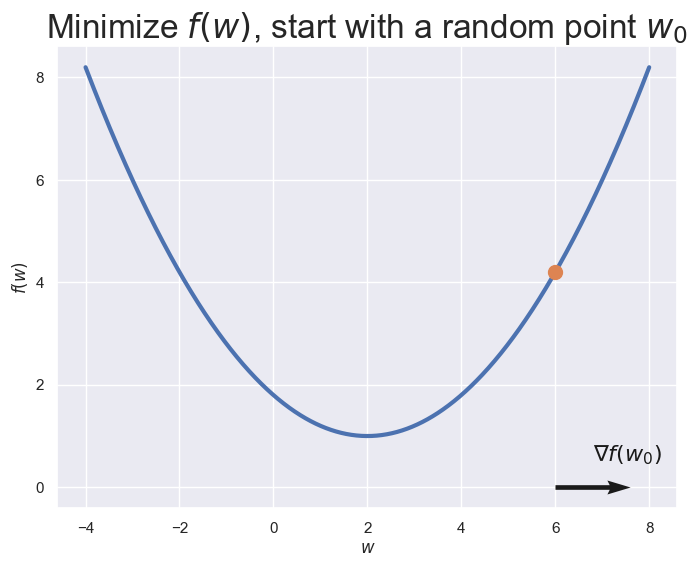

In [5]:
plt.figure(figsize=(8,6))
w = np.linspace(-4,8,1000)
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')
plt.title(r'Minimize $f(w)$, start with a random point $w_0$',fontsize = 24);
w_0 = 6
plt.plot(w_0, f(w_0), "o",markersize=10)

def draw_vector_2D(ax, x, y, lenx, leny,name,color='k'):
#     grad = np.array([-np.sin(x),np.cos(y)])
    ax.quiver(x,y,lenx, leny, color=color,angles='xy', scale_units='xy', scale=1)
    ax.text(x+lenx/2, y+leny/2+0.5,name,fontsize = 16,color=color)
    
draw_vector_2D(plt, w_0, 0, dfdw(w_0),0, r'$\nabla f(w_0)$','k')

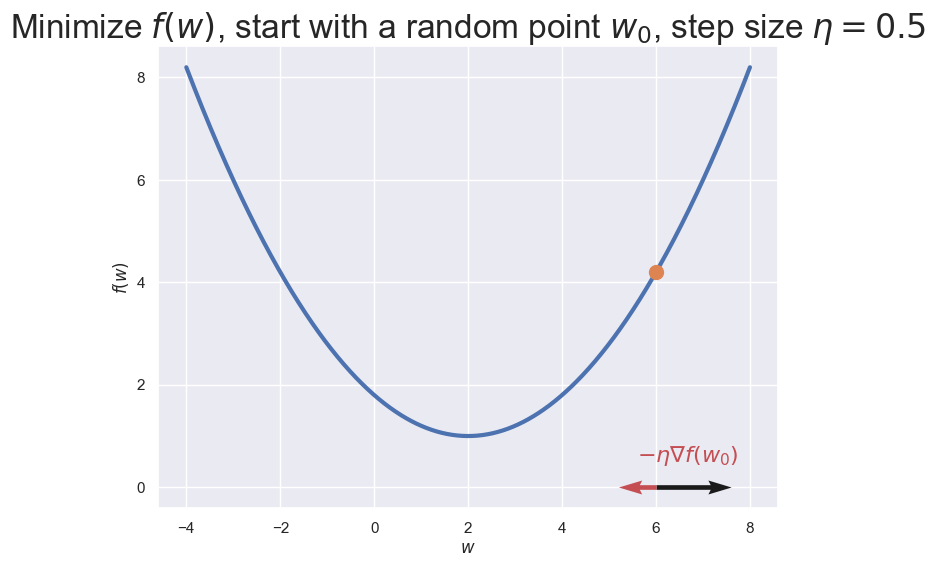

In [6]:
plt.figure(figsize=(8,6))
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

plt.title(r'Minimize $f(w)$, start with a random point $w_0$, step size $\eta=0.5$',fontsize = 24);
w_0 = 6
plt.plot(w_0, f(w_0), "o",markersize=10)
    
draw_vector_2D(plt, w_0, 0, dfdw(w_0),0, r' ','k')

eta=0.5

draw_vector_2D(plt, w_0, 0, - dfdw(w_0)*eta,0, r'$-\eta\nabla f(w_0)$','r')

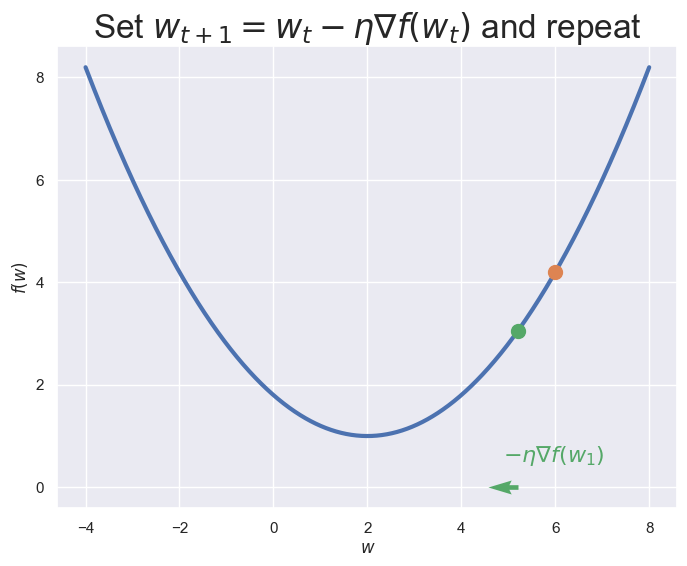

In [7]:
plt.figure(figsize=(8,6))
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

w_1 = w_0 - dfdw(w_0)*eta

plt.title(r'Set $w_{t+1} = w_{t}  - \eta \nabla f(w_t)$ and repeat', fontsize = 24);

plt.plot(w_0, f(w_0), "o",markersize=10)
plt.plot(w_1, f(w_1), "o",markersize=10)

draw_vector_2D(plt, w_1, 0, - dfdw(w_1)*eta,0, r'$-\eta\nabla f(w_1)$','g')

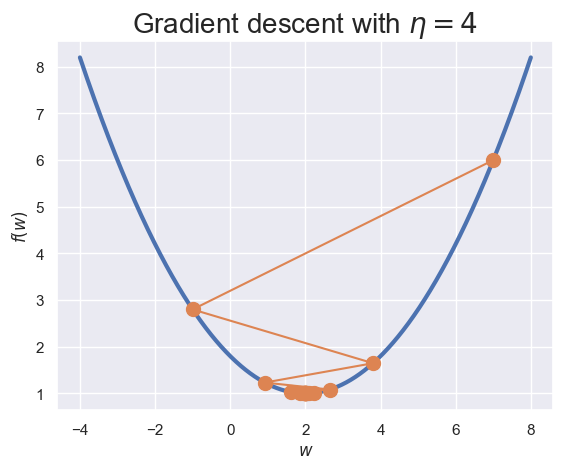

In [8]:
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

# w_1 = w_0 - dfdw(w_0)*eta
w_t = np.zeros(20)
w_t[0] = 7  # w_0
 
eta = 4
    
for i in range(1,20):
    w_t[i] =  w_t[i-1] - eta * dfdw(w_t[i-1] )

plt.title(r'Gradient descent with $\eta={}$'.format(eta), fontsize = 20);

plt.plot(w_t, f(w_t), "o-",markersize=10)

#### Let's plot a function with two variables and look at the gradient

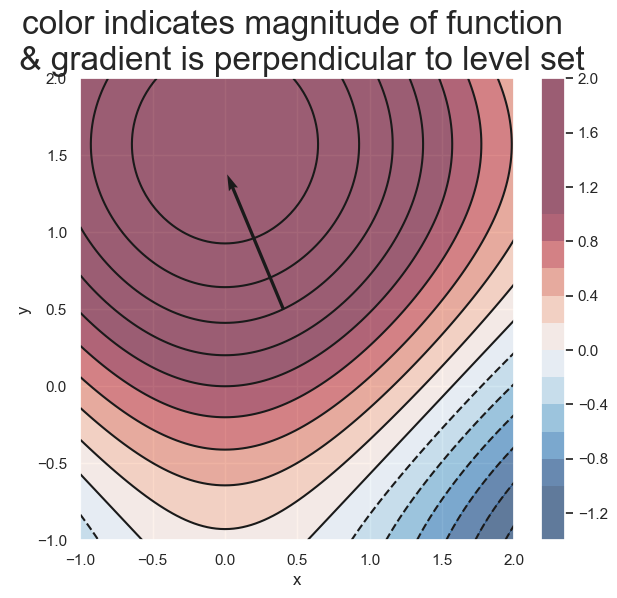

In [22]:
x = np.linspace(-1,2,100);y = np.linspace(-1,2,100); X,Y = np.meshgrid(x, y)

f_XY = np.cos(X)+np.sin(Y)

plt.figure(figsize=(7,6))
cs = plt.contourf(X, Y, f_XY,20,cmap='RdBu_r',vmin=-1,vmax=1,alpha=0.6);plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel('x');plt.ylabel('y')
plt.title('color indicates magnitude of function \n & gradient is perpendicular to level set', fontsize=24)

y_val = 0.5
x_val = 0.4
draw_vector_2D(plt,x_val,y_val,-np.sin(x_val),np.cos(y_val),'','k')

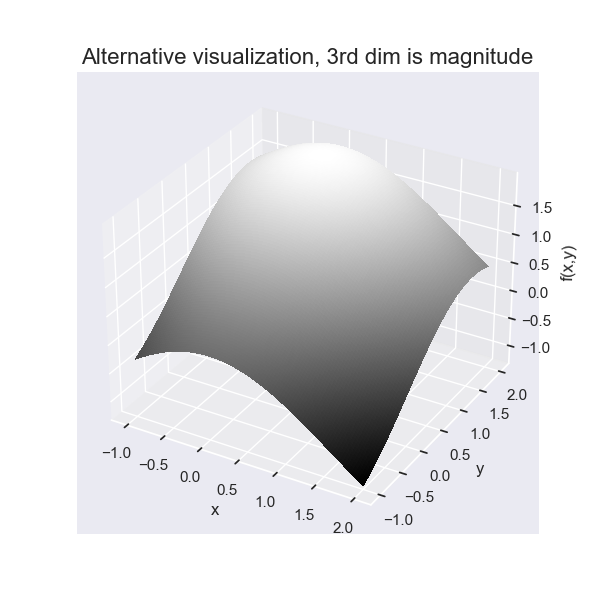

In [23]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
Z = np.cos(X)+np.sin(Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='gray',
                       linewidth=0, antialiased=False, rcount=200, ccount=200)
ax.set_xlabel('x');ax.set_ylabel('y');ax.set_zlabel('f(x,y)');
ax.set_title('Alternative visualization, 3rd dim is magnitude', fontsize=16);

## Logistic regression gradient ascent

Simple simulated example

In [24]:
# Previous example
mu_1_1 = -5; sigma_1_1 = 2;mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2; mu_2_0 = -5; sigma_2_0 = 2
cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )
# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (20))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (20))

X = np.vstack([X_positive, X_negative])
Y = np.vstack([np.ones((X_positive.shape[0],1)),np.zeros((X_negative.shape[0],1))])

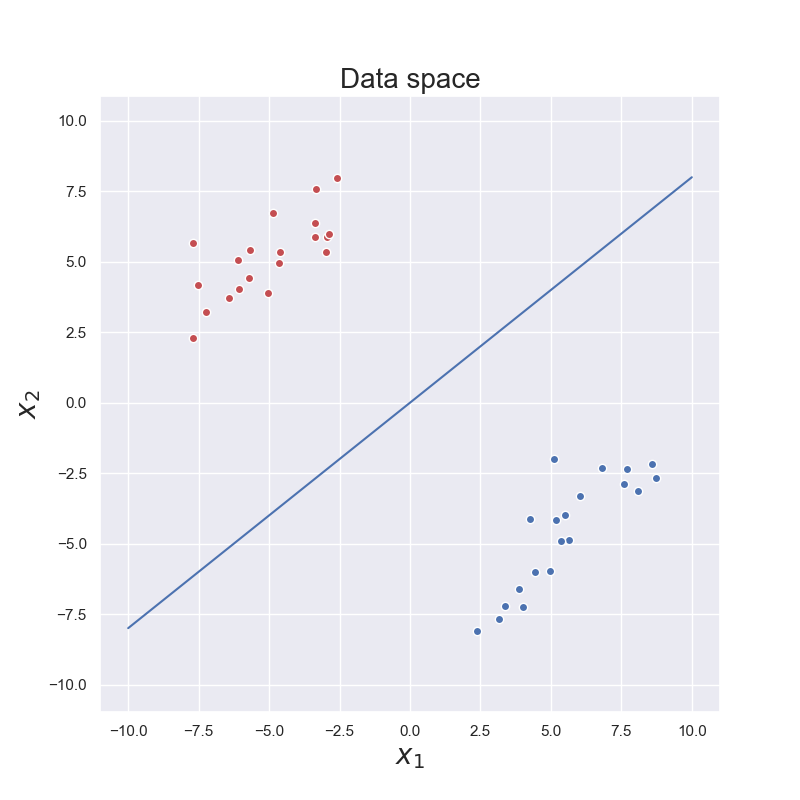

In [25]:
plt.figure(figsize=(8,8))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.plot(x1, x1*0.8)

plt.axis([-10,10,-10,10]),plt.axis('equal')
plt.xlabel(r'$x_1$',fontsize=20)
plt.ylabel(r'$x_2$',fontsize=20)
plt.title('Data space',fontsize=20);

## Log likelihood plot

\begin{eqnarray}
l({\bf w}) &=& \sum_i \left [ y^{(i)} \left( {\bf w}^\top{\bf x}^{(i)} \right)  - \ln \left( 1 + \exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)  \right) \right]
\end{eqnarray}


#### We omit $w_0$ in the example below for simplicity

In [26]:
w1x = np.linspace(-50,40,100)
w2x = np.linspace(-50,40,100)
W1,W2 = np.meshgrid(w1x, w2x)

## ommiting w_0 just for illustration
def loglikelihood(w1,w2):
    w = np.array([[w1],[w2]]) # make w_vec
    loglihood = np.sum(Y*X.dot(w) - np.log(1+ np.exp(X.dot(w))))
    return loglihood
                  
L_w = np.vectorize(loglikelihood)(*np.meshgrid(w1x, w2x))

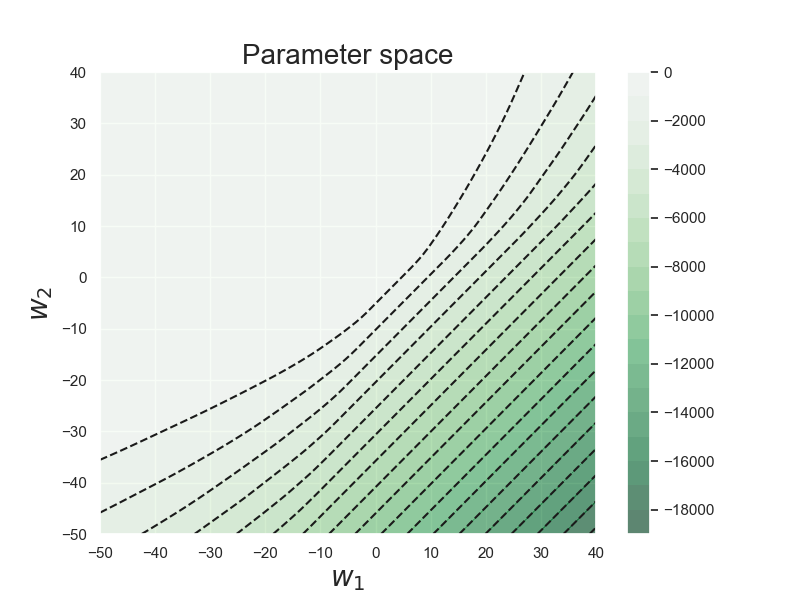

In [27]:
plt.figure(figsize=(8,6))

cs = plt.contourf(W1, W2, L_w,20,cmap='Greens_r',vmin=np.min(L_w),vmax=0,alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20)
plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Parameter space',fontsize=20);

## Gradient computation

\begin{eqnarray}
l({\bf w})  &=& \sum_i \left [ y^{(i)} \left( {\bf w}^\top{\bf x}^{(i)} \right)  - \ln \left( 1 + \exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)  \right) \right]\\
&&{\bf w}^\top{\bf x}^{(i)} = \sum_{j=1}^d w_jx_j^{(i)} 
\end{eqnarray}

\begin{eqnarray}
\frac{\partial l({\bf w})}{\partial w_j} &=& \sum_i \left [ y^{(i)}x_j^{(i)}   - x_j^{(i)} \frac{\exp \left( {\bf w}^\top{\bf x}^{(i)}  \right)} {\left( 1 + \exp \left(  {\bf w}^\top{\bf x}^{(i)}  \right)  \right) }  \right] \\
&=& \sum_i x_j^{(i)}  \left [ y^{(i)} - \hat P(Y = 1|X = {\bf x}^{(i)}, {\bf w}) \right]
\end{eqnarray}



In [30]:
def gradient_likelihood(w1,w2,X,Y):
    w = np.array([[w1],[w2]])
    P_Y_1 = np.exp(X.dot(w))/(1+ np.exp(X.dot(w)))
    gw1 = X[:,0:1].T.dot(Y-P_Y_1)
    gw2 = X[:,1:2].T.dot(Y-P_Y_1)
    return gw1, gw2

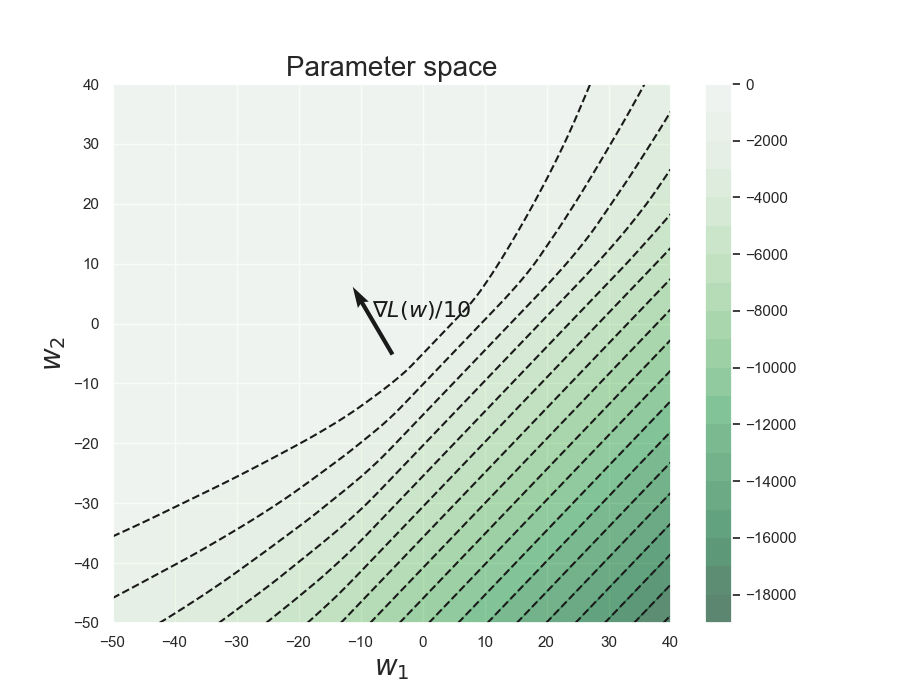

In [31]:
plt.figure(figsize=(9,7))
cs = plt.contourf(W1, W2, L_w,20,cmap='Greens_r',vmin=np.min(L_w),
                  vmax=0,alpha=0.6); plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20);plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Parameter space',fontsize=20);

w1 = -5; w2 = -5
gw1, gw2 = gradient_likelihood(w1,w2,X, Y)
draw_vector_2D(plt, w1,w2,gw1/10,gw2/10, r'$\nabla L(w)/10$','k');

## Gradient ascent for logistic regression

Iterate until convergence (until change $< \epsilon$)

<!-- \begin{eqnarray}
 w_0^{(t+1)} = w_0^{(t)} + \eta \sum_j \left [ y^j - \hat P(Y^j=1|{\bf x}^j, {\bf w^{(t)}}) \right]
\end{eqnarray} -->

for $j = 0...d$:

\begin{eqnarray}
w_j^{(t+1)} =  w_j^{(t)} + \eta \sum_i x_j^{(i)}  \left [ y^{(i)} - \hat P(Y = 1|X = {\bf x}^{(i)}, {\bf w}^{(t)}) \right]
\end{eqnarray}


What is the $\left[ y^{(i)} - \hat P(Y = 1|X = {\bf x}^{(i)}, {\bf w}^{(t)}) \right]$ term doing?
- $\hat P(Y = 1|X = {\bf x}^{(i)}, {\bf w}^{(t)})$ is our current prediction of the label.
- compare this to actual label $y^{(i)}$
- multiply difference by feature value for point $i$

#### Gradient Descent (Ascent) is simplest of approaches

#### Compare to: Stochastic Gradient Descent

- Typically, the loss / function to minimize is a mean over the loss for each individual point: $ L({\bf w}) = \frac{1}{n}\sum_{i=1}^n L_i({\bf w})$.

- We use $\nabla L_i({\bf w})$ instead of $\nabla L({\bf w})$. Since we sample over the points uniformly, they all have equal proability, and the expected value of $\nabla L_i({\bf w})$ is:
    - $E\nabla L_i({\bf w}) = \sum_{i=1}^n P(i)L_i({\bf w}) = \frac{1}{n}\sum_{i=1}^n L_i({\bf w}) = \nabla L({\bf w})$.

- $\nabla L_i({\bf w})$ is faster to compute
- we make n updates for each epoch
- $\nabla L_i({\bf w})$ has higher variance than $\nabla L({\bf w})$ and therefore introduces noise into the trajectory. However, this still leads to a much faster convergence and the noise can be beneficial as it allows for some exploration.


###  Stochastic Gradient Descent

Algorithm:
- Choose a starting point (typically random or 0)
- While not converged, repeat:
    - for each point $i$ in a reshuffled order of the points: 
        - compute gradient $\nabla L_i({\bf w})$
        - choose a step size (start large and decrease) 
        - ${\bf w}\leftarrow {\bf w} - \eta\nabla L_i({\bf w})\,.$
- Return after stopping criterion satisfied
 
 

### Batch gradient descent

To reduce the noise in the gradients at individual datapoints, one approach is to:
- use a batch of $B$ datapoints sampled from the dataset at each step. 
- in each iteration, one can go over all the dataset in batches.


Algorithm:
- Choose a starting point (typically random or 0)
- While not converged, repeat:
    - for each batch $B$ in a reshuffled order of the points: 
        - compute gradient $\nabla L_{B}({\bf w}) = \sum_{i \in B}\nabla L_i({\bf w})$
        - choose a step size (start large and decrease) 
        - ${\bf w}\leftarrow {\bf w} - \eta\nabla L_B({\bf w})\,.$
- Return after stopping criterion satisfied
 
 

### Effect of step-size $\eta$:
- Large: Fast convergence but larger residual error, also possible oscillations
- Small: Slow convergence but small residual error

#### Extra Reading: Learning rate decay, and other gradient descent methods
- This is [Sebastian Ruder's blog post](https://ruder.io/optimizing-gradient-descent/index.html#adagrad).  You can see animations by Alec Radford on this [blogpost](http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html) for demos. You can also explore this [interactive visualization from Roberts Dionne](http://www.robertsdionne.com/bouncingball/).
- In the examples above, we had a fixed learning rate for simplicity, but the choice of the learning rate is very important and affects the behavior and convergence time of the algorithm. 
- When using SGD, we can have a large learning rate because the gradients are mostly pointing in the same direction.  Later in training, we are closer to the optimum and the gradients are more noisy. We want to slow down the training to average the noise. We can use the validation dataset to perform this:
    - when the validation set loss stops decreasing, we reduce the learning rate
    - if the validation set still doesn't decrease, stop
    - compute the validation loss after multiple iterations to have a less fluctuating estimate.

#### Momentum

Ravines (where the surface curves steeply in one dimension) are problematic because SGD can oscillate. 
- Momentum  helps accelerate SGD in the relevant direction and dampens oscillations. 
- This is done using a fraction $\gamma$ of the update vector of the past time step that is added to the current update:
$$\Delta w_{t} = \gamma \Delta  w_{t-1} + \nabla L(w_t)$$
$$w_{t+1} = w_t  - \Delta w_{t}$$
- $\gamma$ is usually set to 0.9.  The momentum term increases the update for dimensions for which the gradients point in the same directions, and decreases the update for dimensions that are changing. This leads to faster convergence and less oscillation.

#### Nesterov Accelerated gradient
- NAG is a way to incorporate some look ahead into the update. The algorithm first takes a partial step in the direction of the previous update then computes the gradient in that new location:

$$\Delta w_{t} = \gamma \Delta  w_{t-1} + \nabla L(w_t -\gamma\Delta  w_{t-1})$$
$$w_{t+1} = w_t  - \Delta w_{t}$$

- NAG first makes a jump in the direction of the previous accumulated gradient then makes a "correction" by computing the gradient at that location.

#### Adagrad
- Adagrad adapts the learning rate to the dimensions of $w$: it makes less sparse dimensions (or ones that have a larger magnitude features) have lower learning rates than more sparse dimensions (or ones that have a smaller magnitude).
$$w_{t+1,i}  = w_{t,i} - \frac{\eta}{G_{t,ii} + \epsilon}\nabla L(w)_i$$
- $G_t$ is a diagonal matrix with the sum of the squares of the gradient of the $i$th element at each $i,i$ entry. 

- When using Adagrad, we don't need to tune the learning rate. However, as training goes on, the updates become smaller and smaller and the algorithm can stagnate. This is solved by the algorithms on the next slide. 

#### Adadelta

- Adadelta resolves the slowing learning rate by reducing the dependence on the sum of the gradients so far through the introduction of a forgetting factor. Adadelta computes the weighted sum:

$$ E[\nabla L(w)^2]_{t} = \gamma E[\nabla L(w)^2]_{t-1} +(1-\gamma) \nabla L(w)_t^2$$

- where $\gamma$ is set to values similar to the momentum rate. 

$$\delta w_{t}  = \frac{\eta}{E[\nabla L(w)^2]_{t} + \epsilon}\nabla L(w)_t$$


#### RMSprop

- RMSprop was proposed at the same time as Adadelta, and is very similar.

### End of extra reading. 
- You can also read about other methods such as Newton's method, Conjugate gradient ascent, IRLS 
(see Bishop 4.3.3)

## What happens if data is linearly separable?

Decision boundary:
$$
 w_0 + \sum_{j=1}^d w_jx_j^{(i)} = 0
$$
What about:
$$
 10w_0 + \sum_{j=1}^d 10w_jx_j^{(i)} = 0
$$
or
$$
 10000w_0 + \sum_{j=1}^d 10000w_jx_j^{(i)} = 0
$$




Same boundary! Which one has higher log likelihood?

$$l({\bf w}) \equiv \ln \prod_i P(Y = y^{(i)}|X = {\bf x}^{(i)},{\bf w}) =  \sum_i \left [ y^{(i)} \left( {\bf w}^\top{\bf x}^{(i)} \right)  - \ln \left( 1 + \exp \left(  {\bf w}^\top{\bf x}^{(i)} \right)  \right) \right] $$

/var/folders/hx/t6_xnh5978s_6dsf2vb0kwv80000gn/T/ipykernel_67464/2433894329.py:5: RuntimeWarning: overflow encountered in exp
  plt.plot(z,1/(1+np.exp(-100*z)), label = 'a=100')


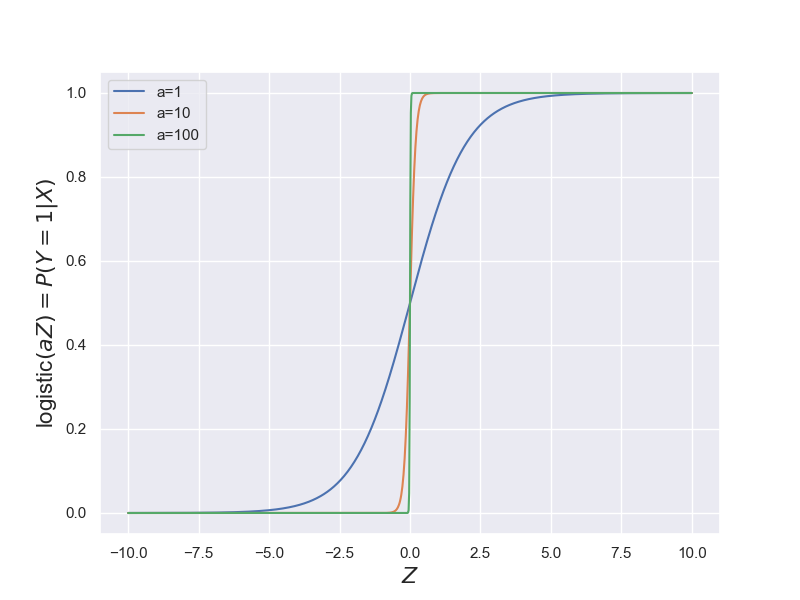

In [32]:
plt.figure(figsize=(8,6))
z = np.linspace(-10,10,1000)
plt.plot(z,1/(1+np.exp(-z)), label = 'a=1')
plt.plot(z,1/(1+np.exp(-10*z)), label = 'a=10')
plt.plot(z,1/(1+np.exp(-100*z)), label = 'a=100')
plt.legend(); plt.xlabel(r'$Z$',fontsize=16); 
plt.ylabel(r'logistic$(a Z) = P(Y=1|X)$',fontsize=16);

## Need to regularize the weights

- ${\bf w}\rightarrow \infty$ if the data is linearly separable

- For MAP, need to define prior on $W$
    - given $W = (W_1, … W_d)$
    - let’s assume prior $P(W_i) = \mathcal{N}(0, \sigma)$

- A kind of Occam’s razor (simplest is best) prior

- Helps avoid very large weights and overfitting

### Adding a prior on $W$

MAP estimation picks the parameter $W$ that has maximum posterior probability $P(W|Y,X)$ given the conditional likelihood $P(Y|W,X)$ and the prior $P(W)$.

Using Bayes rule again:

\begin{eqnarray} W^{MAP} &=& \underset{W}{\operatorname{argmax}} P(W|Y,W)   = \underset{W}  {\operatorname{argmax}} \frac{P(Y|W,X)P(W,X)}{P(Y,X)} \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W,X) \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W)P(X) ~~~~~ \text{ assume } P(W,X) = P(W)P(X) \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W)\\
&=& \underset{W}{\operatorname{argmax}} \ln P(Y|W,X) + \ln P(W)
\end{eqnarray}

### Adding a prior on $W$

Zero Mean Gaussian prior on $W$: $$P(W_j=w_j) = \frac{1}{2\pi\sigma^2}\exp\big(-\frac{w_j^2}{2\sigma^2} \big )$$

\begin{eqnarray} {{\bf w}}^{MAP}  = \underset{ {\bf w}}{\operatorname{argmax}} \ln P(Y|W,X) - \frac{\sum_{j=0}^d w_j^2}{2\sigma^2} 
\end{eqnarray}

This “pushes” parameters towards zero and corresponds to Regularization
- Helps avoid very large weights and overfitting
- More on this in the next lecture

In [33]:
lmbda = 10 # this is 1/(2*sigma**2)

def logposterior(w1,w2):
    w = np.array([[w1],[w2]]) # make w_vec
    loglihood = np.sum(Y*X.dot(w) - np.log(1+ np.exp(X.dot(w))))
    loglihood += - (w1**2 + w2**2)*lmbda
    return loglihood

L_w = np.vectorize(logposterior)(*np.meshgrid(w1x, w2x))

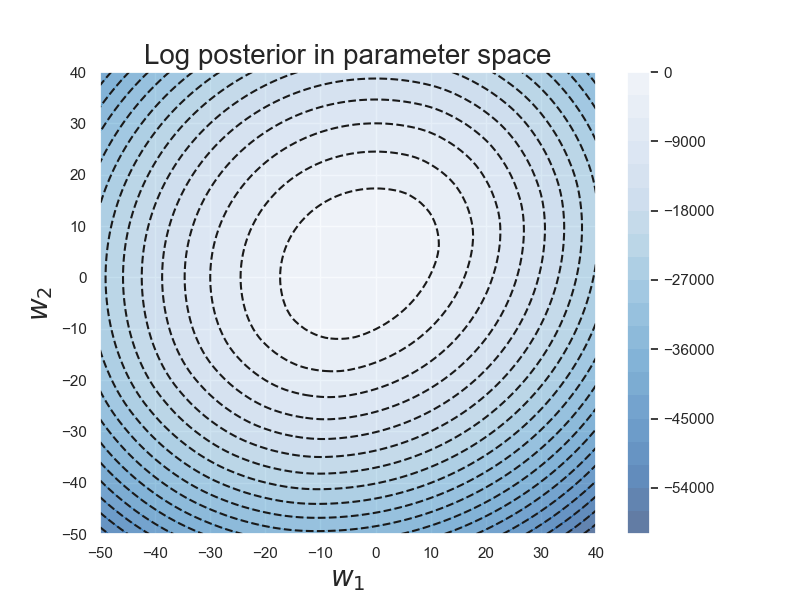

In [34]:
plt.figure(figsize=(8,6))
cs = plt.contourf(W1, W2, L_w,20,cmap='Blues_r',vmin=np.min(L_w),
                 vmax=0,alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20)
plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Log posterior in parameter space',fontsize=20);

In [35]:
def gradient_posterior(w1,w2,X,Y):
    w = np.array([[w1],[w2]])
    P_Y_1 = np.exp(X.dot(w))/(1+ np.exp(X.dot(w)))
    gw1 = X[:,0:1].T.dot(Y-P_Y_1)- 2*lmbda*w1
    gw2 =X[:,1:2].T.dot(Y-P_Y_1) - 2*lmbda*w2 
    return gw1, gw2

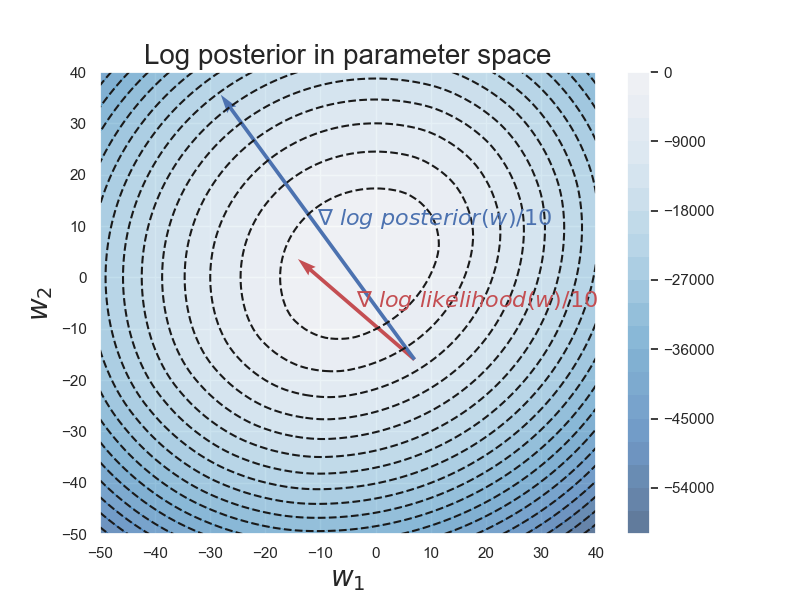

In [37]:
plt.figure(figsize=(8,6))
cs = plt.contourf(W1, W2, L_w,20,cmap='RdBu_r',vmin=-np.max(np.abs(L_w)),
                 vmax=np.max(np.abs(L_w)),alpha=0.6); plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20);plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Log posterior in parameter space',fontsize=20);
w1 = 7; w2 = -16
gw1, gw2 = gradient_likelihood(w1,w2,X, Y)
draw_vector_2D(plt, w1,w2,gw1/10,gw2/10, r'$\nabla ~ log~ likelihood(w)/10$','r');
gw1, gw2 = gradient_posterior(w1,w2,X, Y)
draw_vector_2D(plt, w1,w2,gw1/10,gw2/10, r'$\nabla ~ log~ posterior(w)/10$','b');

## Let's compare Logistic Regression to Gaussian Naive Bayes

Consider these two assumptions:
- $X_1$ conditionally independent of $X_2$ given $Y$
- $P(X_j | Y = y_k)  =  \mathcal{N}(\mu_{jk},\sigma_j)$, not $\mathcal{N}(\mu_{jk},\sigma_{jk})$
    - i.e. shared standard deviation

Consider three learning methods:
- GNB (assumption 1 only)     --- decision surface can be non-linear
- GNB2 (assumption 1 and 2)   --- decision surface linear
- LR --- decision surface linear, trained without assumption 1 or estimating $P(X_j | Y = y_k)$.

How do these methods perform if we have plenty of data and:

Both (1) and (2) are satisfied.





## Assumption 1 and 2 are satisfied
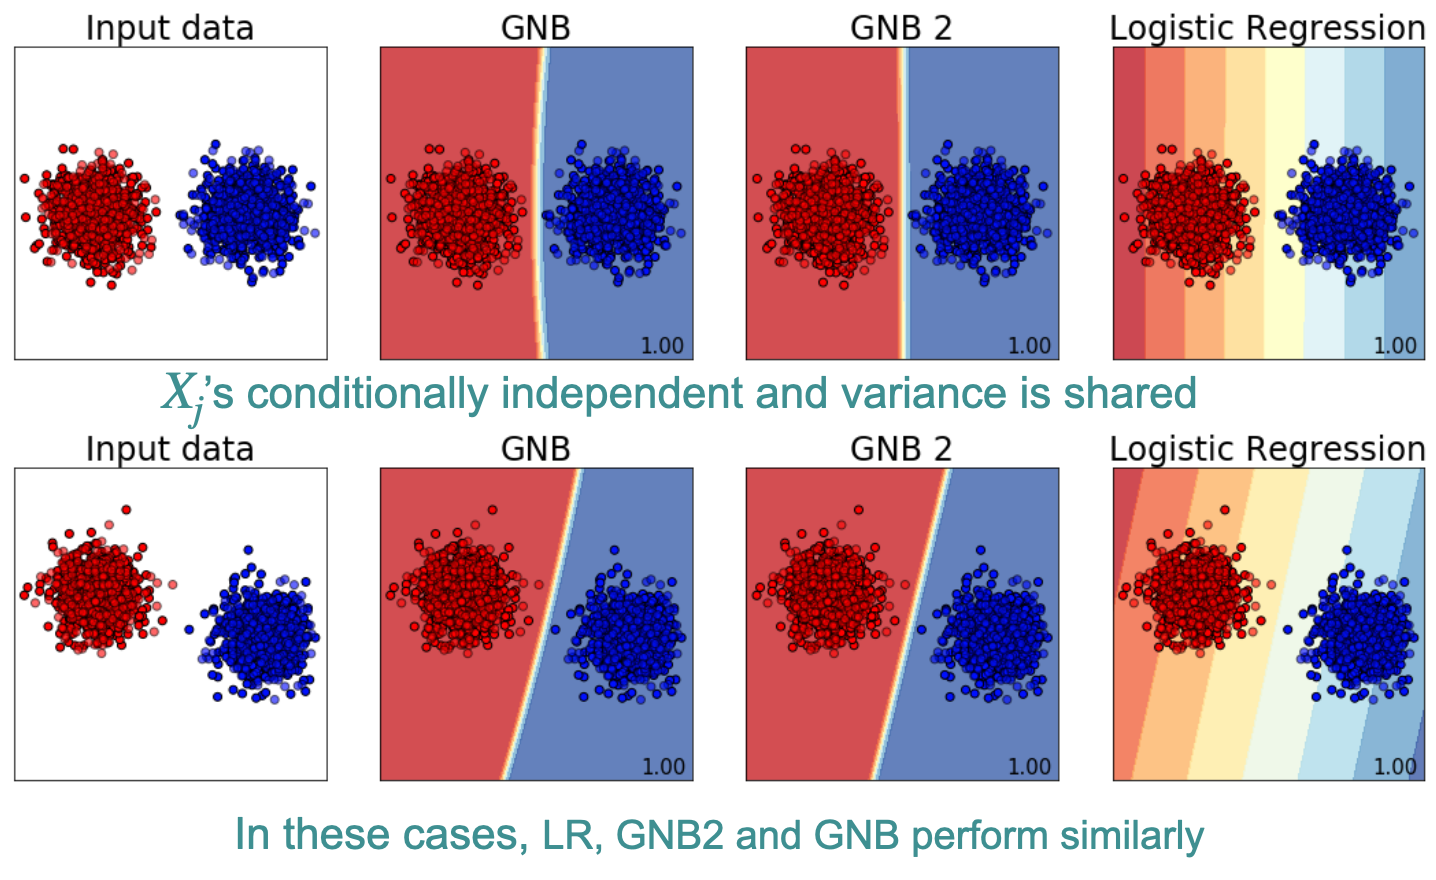

## Assumption 1 and 2 are satisfied

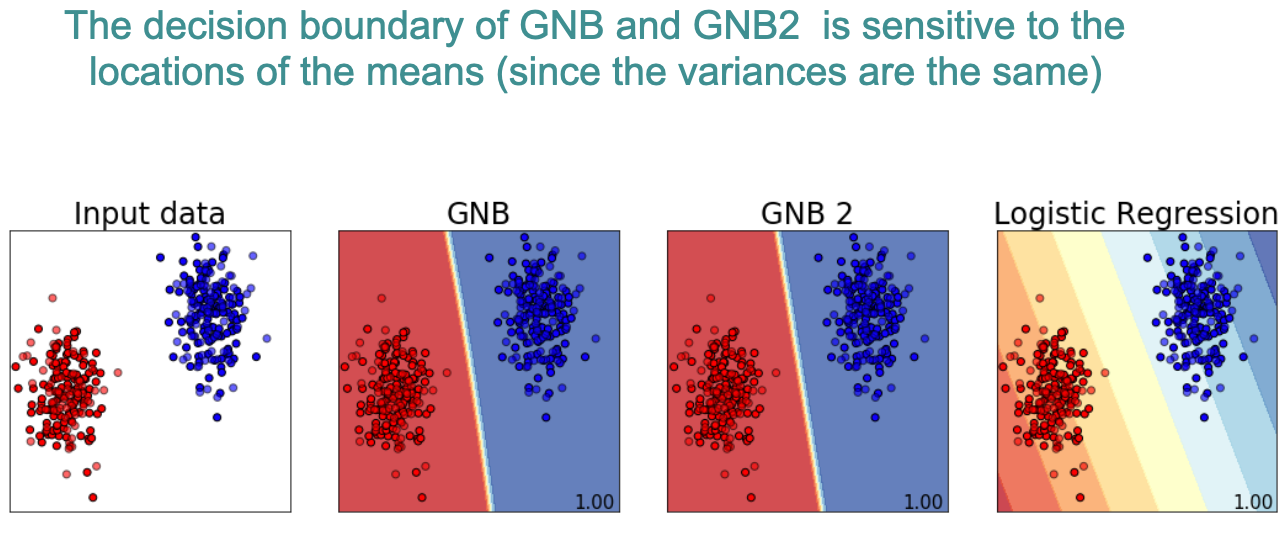

## Assumption 1 and 2 are satisfied

Recall the decision boundary of GNB when the variances are exactly equal:

\begin{eqnarray} 
\ln \frac{P(Y=1|X_1...X_d)}{P(Y=0|X_1...X_d)} &=& C + G(X)\\ 
G(X) &=&  -\frac{1}{2}  \sum_i   \big(  x_{j} ^2(\frac{1}{\sigma_{j1}^2} - \frac{1}{\sigma_{j0}^2} ) - 
2 x_{j} (\frac{\mu_{j1}}{\sigma_{j1}^2} - \frac{\mu_{j0}}{\sigma_{j0}^2} )
+ (\frac{\mu_{j1}^2}{\sigma_{j1}^2} - \frac{\mu_{j0}^2}{\sigma_{j0}^2} )
\big ) \\
G(X) &=&   \sum_j   \big(    x_{j} \frac{\mu_{j1}-\mu_{j0}}{\sigma_{j}^2} \big )
- \sum_j   \big(   \frac{\mu_{j1}^2 - \mu_{j0}^2}{2\sigma_{j}^2}  
\big )
\end{eqnarray}   



The decision boundary is linear, of the form: $\beta_0 + \sum_j \beta_j x_j = 0$.

The parameters are determined using the distance between centers, weighted by variance on each dimension.

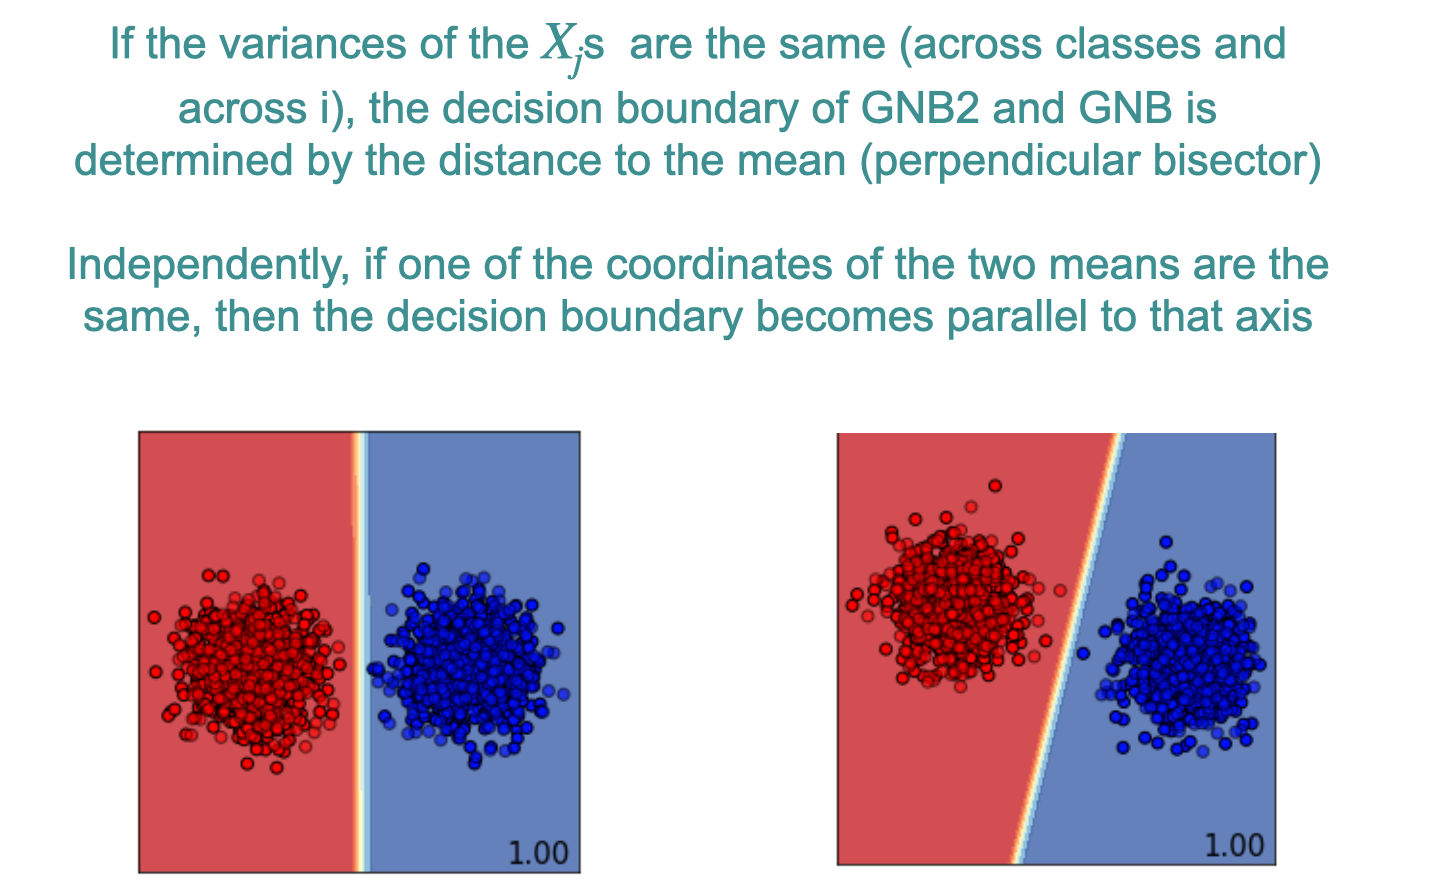

## Let's compare Logistic Regression to Gaussian Naive Bayes

Consider these two assumptions:
- $X_1$ conditionally independent of $X_2$ given $Y$
- $P(X_j | Y = y_k)  =  \mathcal{N}(\mu_{jk},\sigma_j)$, not $\mathcal{N}(\mu_{jk},\sigma_{jk})$
    - i.e. shared standard deviation

Consider three learning methods:
- GNB (assumption 1 only)     --- decision surface can be non-linear
- GNB2 (assumption 1 and 2)   --- decision surface linear
- LR --- decision surface linear, trained without assumption 1 or estimating $P(X_j | Y = y_k)$.

How do these methods perform if we have plenty of data and:

(2) is satisfied, but not (1).


## Assumption 2 satisfied and not 1

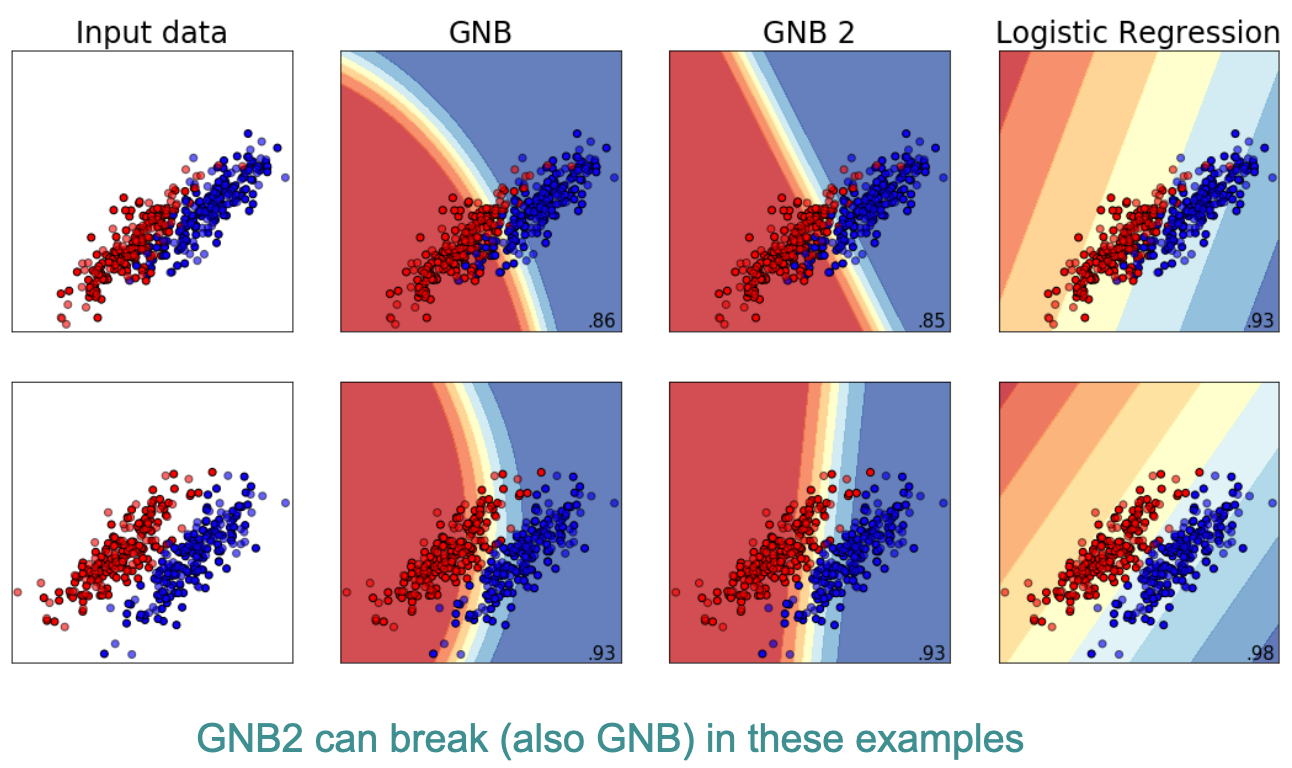

## Assumption 2 satisfied and not 1
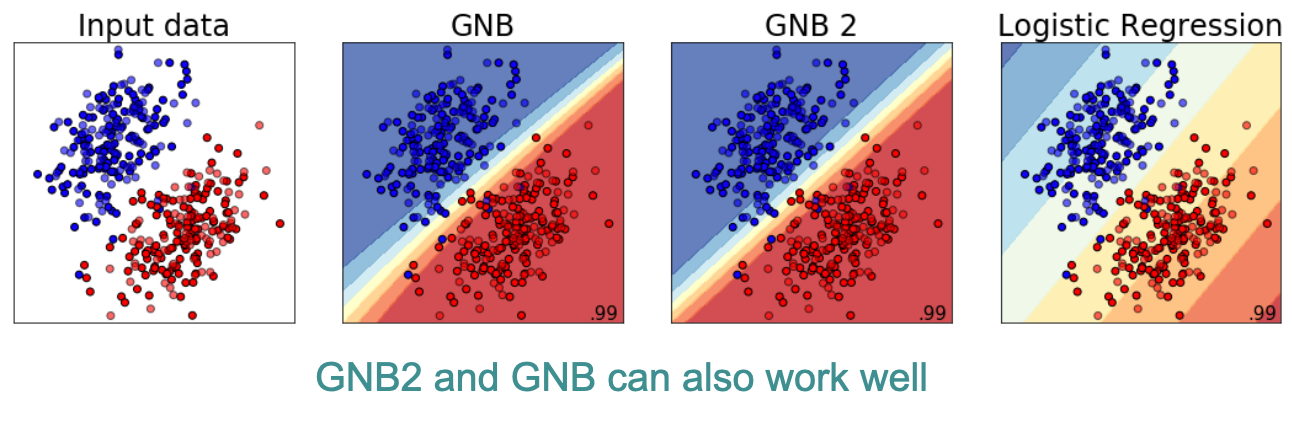

## Assumption 2 satisfied and not 1

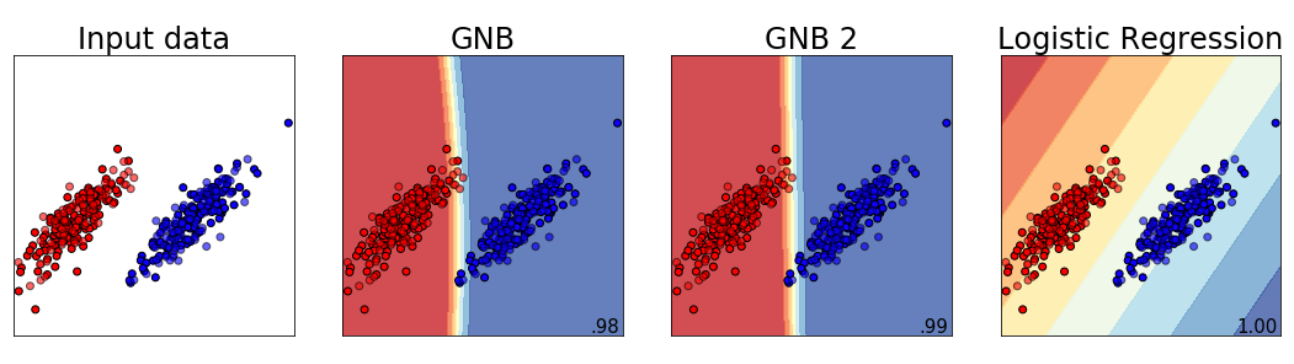

Why doesn't GNB2 learn the same boundary as LR?

The decision boundary for GNB 2 is linear, of the form: $\beta_0 + \sum_j \beta_j x_j = 0$.

But each parameters is linked to the individual means and standard deviation of each dimension $x_j$, e.g.:

$$ \beta_j =  \frac{\mu_{j1}-\mu_{j0}}{\sigma_{j}^2} $$ 


GNB 2 is therefore less flexible than LR.

## Let's compare Logistic Regression to Gaussian Naive Bayes

Consider these two assumptions:
- $X_1$ conditionally independent of $X_2$ given $Y$
- $P(X_j | Y = y_k)  =  \mathcal{N}(\mu_{jk},\sigma_j)$, not $\mathcal{N}(\mu_{jk},\sigma_{jk})$
    - i.e. shared standard deviation

Consider three learning methods:
- GNB (assumption 1 only)     --- decision surface can be non-linear
- GNB2 (assumption 1 and 2)   --- decision surface linear
- LR --- decision surface linear, trained without assumption 1 or estimating $P(X_j | Y = y_k)$.

How do these methods perform if we have plenty of data and:

Neither (1) nor (2) is satisfied.


## Assumptions 1 and 2 are not satisfied

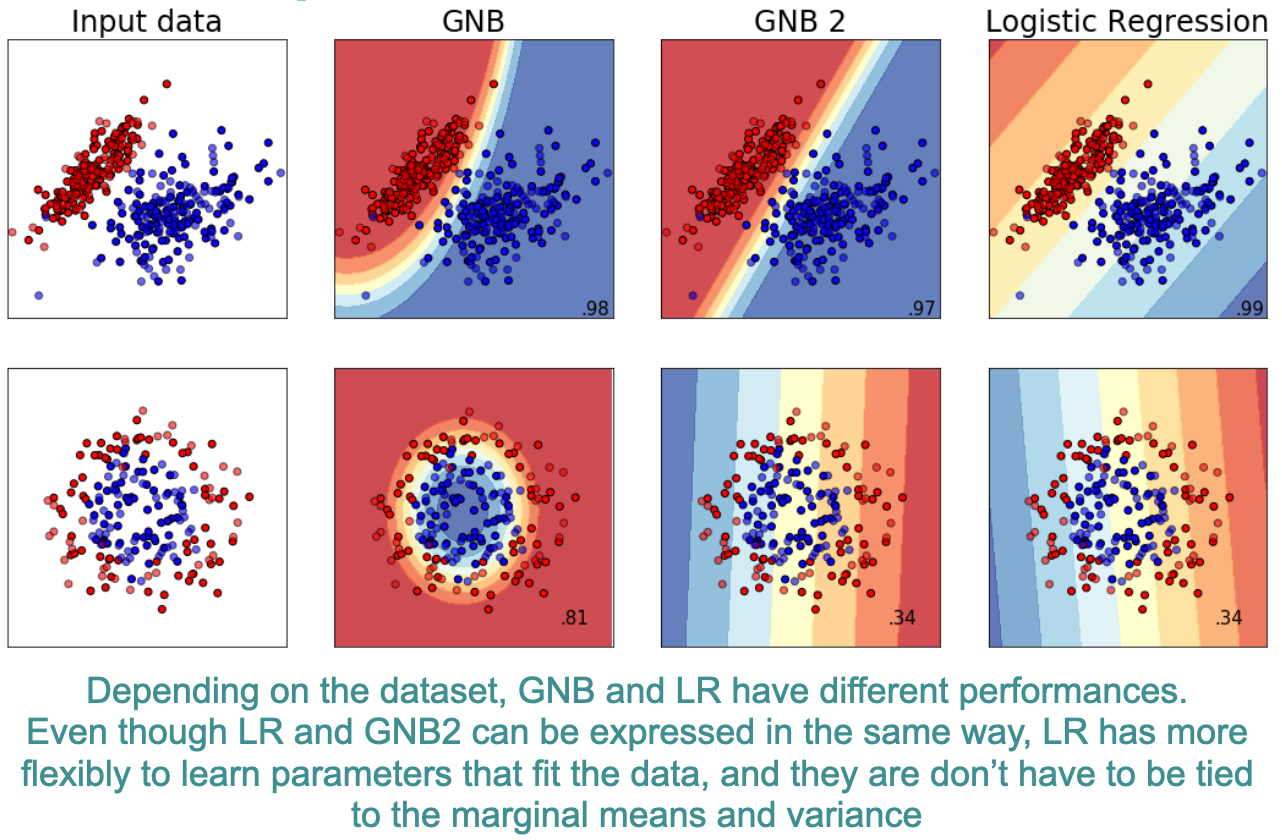

## Let's compare Logistic Regression to Gaussian Naive Bayes


Which method works better if we have **infinite** training data, and...

- Both (1) and (2) are satisfied: LR = GNB2 = GNB

 

- (2) is satisfied, but not (1) :     GNB > GNB2, GNB ? LR,  LR > GNB2

 

- Neither (1) nor (2) is satisfied:   GNB>GNB2,  LR > GNB2, LR??GNB

## Naïve Bayes vs. Logistic Regression

The bottom line:

- GNB2 and LR both use linear decision surfaces, GNB need not

- Given infinite data, LR is better or equal to GNB2 because training procedure does not make assumptions 1 or 2 (though our derivation of the form of P(Y|X) did).

### What happens if we have finite training data?

[Ng & Jordan, 2002] ==> GNB converges more quickly

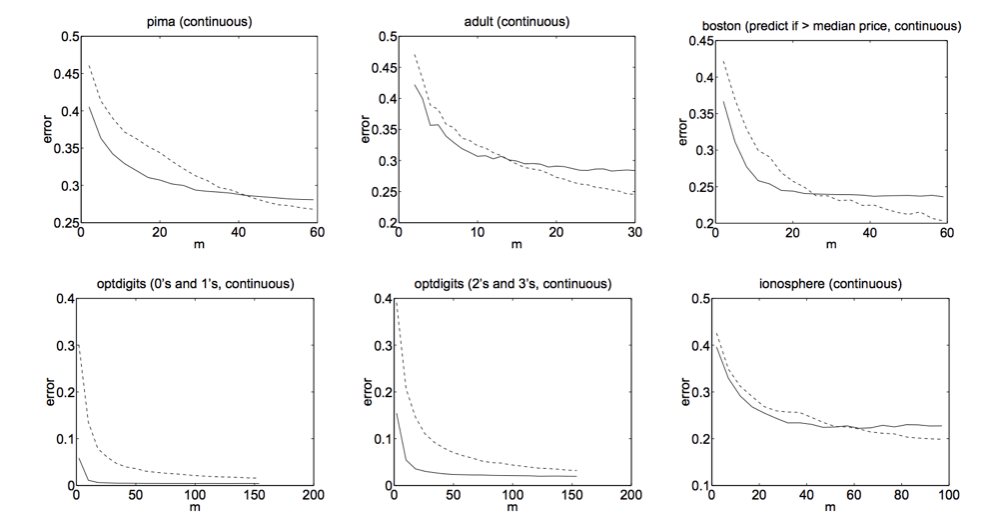

- GNB2 converges more quickly to its perhaps-less-accurate asymptotic error. (more bias than LR)

- And GNB is both more biased (assumption 1) and less (no linearity assumption) than LR, so either might outperform the other.

## What you should know

- Generative vs. Discriminative classifiers


LR is a linear classifier: decision rule is a hyperplane
- LR optimized by conditional likelihood
    - no closed-form solution
    - concave ⇒ global optimum with gradient ascent
    - Maximum conditional a posteriori corresponds to regularization
